In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import itertools
import warnings
plt.style.use('ggplot')

In [84]:
data = pd.read_csv('Electricity_prices.csv')
data.head()

,Date,Electricity
0,01/01/2016,32.89
1,01/02/2016,22.08
2,01/03/2016,26.10
3,01/04/2016,28.48
4,01/05/2016,30.42


<Figure size 864x360 with 0 Axes>

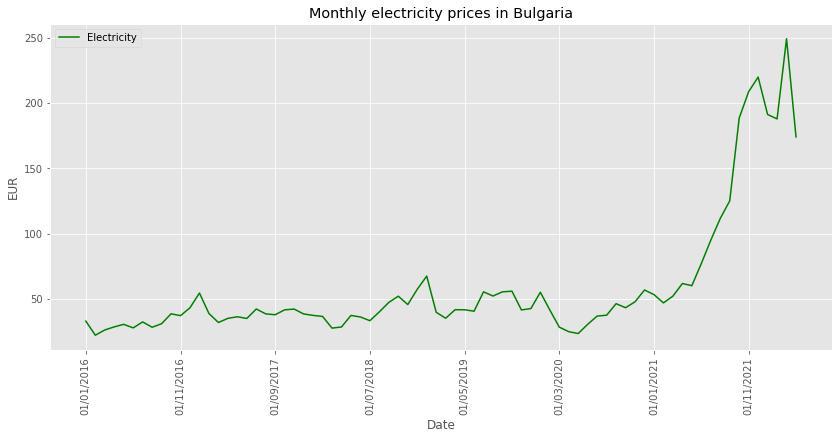

In [85]:
plt.figure(figsize=[12, 5]); # Set dimensions for figure
data.plot(x='Date', y='Electricity', figsize = (14, 6), legend = True, color='g')
plt.title('Monthly electricity prices in Bulgaria')
plt.ylabel('EUR')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Testing the Stationarity of the Dataset:

In [86]:
# Augmented Dickey-Fuller test (ADF Test)
ad_fuller_result = adfuller(data['Electricity'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.5387009371758987
p-value: 0.884240467756525


In [87]:
# The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. 
# The more negative it is, the stronger the rejection of the hypothesis that there is a unit root 
# at some level of confidence.

In [88]:
# The ADF test is a type of unit root test. Unit roots are a cause for non-stationarity, 
# the ADF test will test if the unit root is present. 
# The Null Hypothesis states there is the presence of a unit root. 
# If the P-Value is less than the Significance Level defined, 
# we reject the Null Hypothesis that the time series contains a unit root. 
# In other words, by rejecting the Null hypothesis, we can conclude that the time series is stationary.

In [89]:
#Since the series isn’t stationary, we will commit to the first-order differencing of electricity values 
# and perform the ADF test again on the dataset.

In [90]:
data['Electricity First Difference'] = data['Electricity'] - data['Electricity'].shift(1)
data.dropna(subset = ["Electricity First Difference"], inplace=True)
data

,Date,Electricity,Electricity First Difference
1,01/02/2016,22.08,-10.81
2,01/03/2016,26.10,4.02
3,01/04/2016,28.48,2.38
4,01/05/2016,30.42,1.94
5,01/06/2016,27.71,-2.71
...,...,...,...
71,01/12/2021,219.81,11.11
72,01/01/2022,191.16,-28.65
73,01/02/2022,187.80,-3.36
74,01/03/2022,249.23,61.43


In [91]:
ad_fuller_result = adfuller(data['Electricity First Difference'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.4148222366750374
p-value: 0.010463841896452162


# Visualize Differenced Series:

In [92]:
# The p-value is now less than 0.05, meaning that we can reject the null hypothesis i.e. the time series is stationary. 
# Next, let us visualize the differenced series.

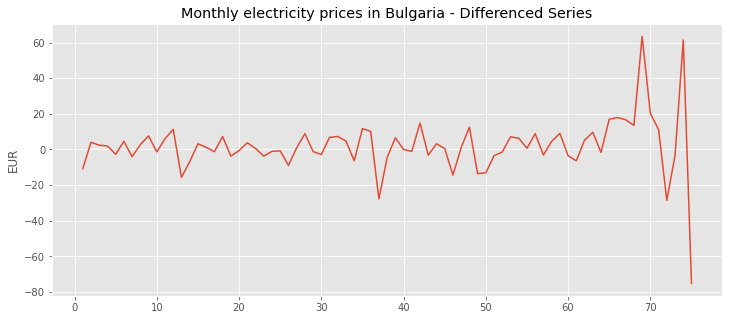

In [93]:
plt.figure(figsize=[12, 5]); # Set dimensions for figure
data['Electricity First Difference'].plot()
plt.title('Monthly electricity prices in Bulgaria - Differenced Series')
plt.ylabel('EUR')
plt.grid(True)

# ACF and PACF Plots:

In [94]:
# building auto-correlation (ACF) and partial auto-correlation plots from the differenced series. 
# ACF describes how well the present value of the series is related to its past values while PACF 
# finds a correlation of the residuals with the next lag value.

C:\Users\manov\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


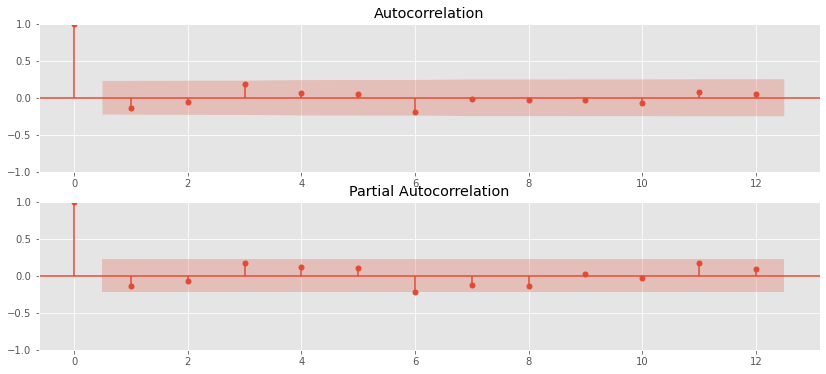

In [95]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Electricity First Difference'].dropna(),lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Electricity First Difference'].dropna(),lags=12,ax=ax2)

## SARIMAX Model:

In [96]:
# After determining that our time series is stationary, we can use the SARIMA model to predict future values.
# The model’s notation is SARIMA(p, d, q) (P, D, Q)lag.
# These three parameters account for seasonality, trend, and noise in data. 
# We will use the AIC (Akaike information criterion) indicator which is an estimator of the relative quality of statistical models. 
# The lower the AIC value the better. After performing multiple iterations, 

In [128]:
best_model = SARIMAX(data['Electricity'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 3)).fit(dis=-1)
print(best_model.summary())

C:\Users\manov\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manov\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manov\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


                                      SARIMAX Results                                      
Dep. Variable:                         Electricity   No. Observations:                   75
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 3)   Log Likelihood                -297.040
Date:                             Thu, 26 May 2022   AIC                            608.080
Time:                                     01:30:35   BIC                            623.919
Sample:                                          0   HQIC                           614.378
                                              - 75                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1594      0.534     -0.298      0.765      -1.206       0.888
ar.L2         -0.8769      

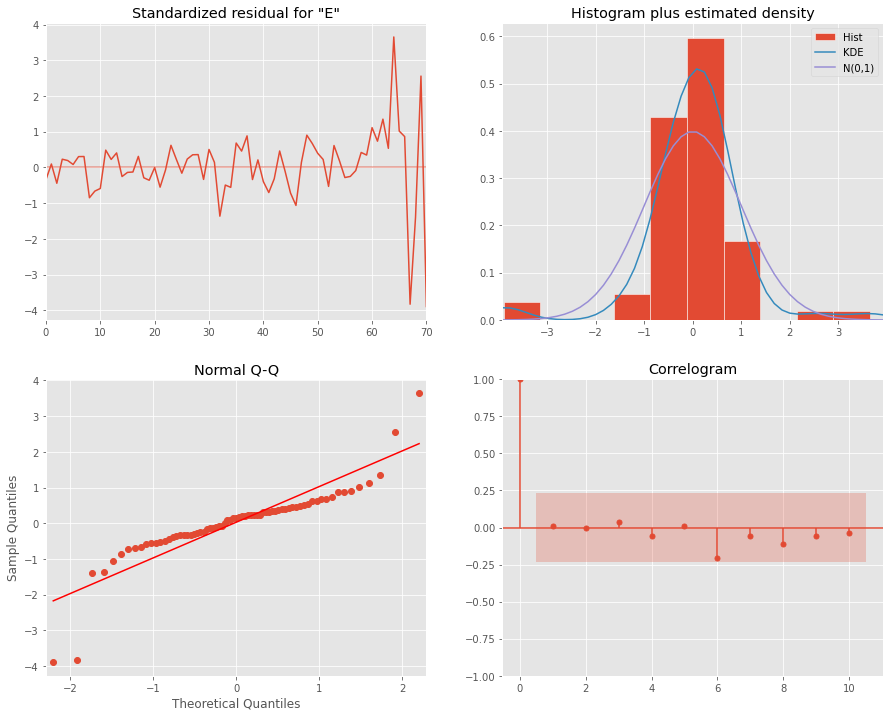

In [129]:
#Diagnosing the model residuals
best_model.plot_diagnostics(figsize=(15,12));

## Model Forecast:

In [130]:
#Forecasting 20 months ahead
forecast_values = best_model.get_forecast(steps = 20)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()


C:\Users\manov\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


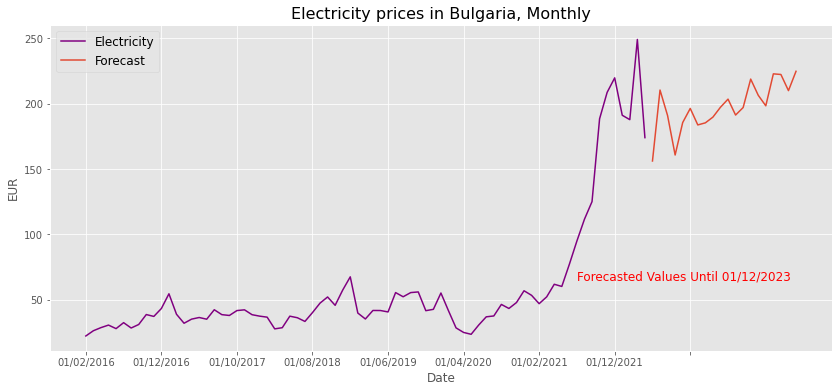

In [131]:
#Plot the data
ax = data.plot(x='Date', y='Electricity', figsize = (14, 6), legend = True, color='purple')

#Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (14, 6), grid=True)


plt.title('Electricity prices in Bulgaria, Monthly', size = 16)
plt.ylabel('EUR', size=12)
plt.legend(loc='upper left', prop={'size': 12})
ax.axes.get_xaxis().set_visible(True)
#annotation
ax.text(65, 65, 'Forecasted Values Until 01/12/2023', fontsize=12,  color='red')
plt.show()
